# Data Modeling
---

In [37]:
# --------------------
# Import Libraries
# --------------------
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from kmodes.kmodes import KModes


sns.set_theme()

### Reading The Cleaned Dataset

In [2]:
# --------------
# Read The Data
# --------------
data = pd.read_csv('../data/processed/mentalhealthData_Cleaned.csv')

In [3]:
data.head()

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness,self_employed_missing
0,Female,United States,Corporate,Unknown,No,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Not Sure,1
1,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,No,1
2,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
3,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,0
4,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,0


### One-Hot Encoding

In [4]:
categorical_cols = [
    'gender', 'country', 'occupation', 'self_employed',
    'family_mh_history', 'sought_treatment',
    'days_spent_indoors', 'noticed_growing_stress',
    'noticed_habit_changes', 'personal_mh_history',
    'mood_swings', 'coping_difficulty',
    'work_engagement', 'social_difficulty',
    'disclose_mh_to_employer', 'care_options_awareness'
]

In [5]:
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown='ignore'
)

X_ohe = ohe.fit_transform(data[categorical_cols])

In [6]:
X_ohe = pd.DataFrame(
    X_ohe,
    columns=ohe.get_feature_names_out(categorical_cols),
    index=data.index
)

In [7]:
X_ohe.head()

,gender_Female,gender_Male,country_Australia,country_Belgium,country_Bosnia And Herzegovina,country_Brazil,country_Canada,country_Colombia,country_Costa Rica,country_Croatia,...,work_engagement_Yes,social_difficulty_Maybe,social_difficulty_No,social_difficulty_Yes,disclose_mh_to_employer_Maybe,disclose_mh_to_employer_No,disclose_mh_to_employer_Yes,care_options_awareness_No,care_options_awareness_Not Sure,care_options_awareness_Yes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
X_with_flag = pd.concat(
    [X_ohe, data[['self_employed_missing']]],
    axis=1
)

In [9]:
X_without_flag = X_ohe.copy()

In [10]:
print(X_with_flag.shape)
print(X_without_flag.shape)

X_with_flag.head()

(290051, 81)
(290051, 80)


,gender_Female,gender_Male,country_Australia,country_Belgium,country_Bosnia And Herzegovina,country_Brazil,country_Canada,country_Colombia,country_Costa Rica,country_Croatia,...,social_difficulty_Maybe,social_difficulty_No,social_difficulty_Yes,disclose_mh_to_employer_Maybe,disclose_mh_to_employer_No,disclose_mh_to_employer_Yes,care_options_awareness_No,care_options_awareness_Not Sure,care_options_awareness_Yes,self_employed_missing
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


## Kmeans Clustering
---

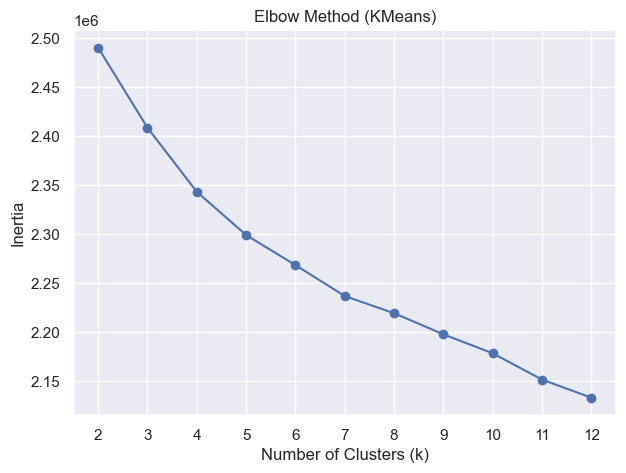

In [11]:
# --------------------------------------------------------------------------------
# Determine Optimal Number of Clusters (k) using Elbow Method and Silhouette Score
# --------------------------------------------------------------------------------

max_k = 12
k_values = range(2, max_k + 1)
inertia = []

X = X_without_flag.values

for k in k_values:
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method (KMeans)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\omara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

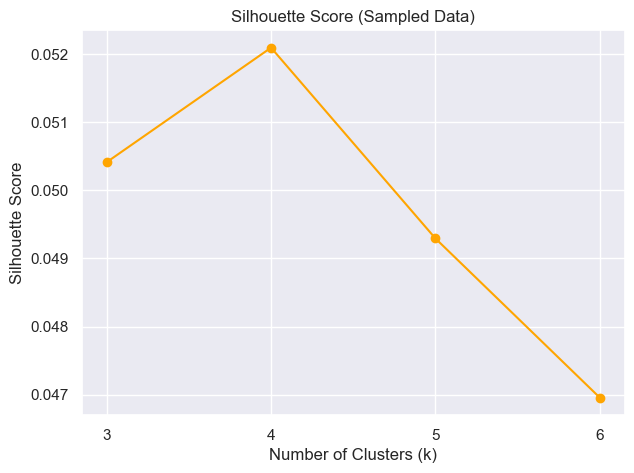

In [12]:
candidate_k = range(3, 7)

# sample ~20–30% or cap at 1000–1500
sample_size = min(1000, X.shape[0])
X_sample = X_without_flag.sample(
    n=sample_size,
    random_state=42
).values

silhouette_scores = []

for k in candidate_k:
    kmeans = KMeans(
        n_clusters=k,
        n_init=10,
        random_state=42
    )
    labels = kmeans.fit_predict(X_sample)
    sil = silhouette_score(X_sample, labels)
    silhouette_scores.append(sil)

plt.figure(figsize=(7, 5))
plt.plot(candidate_k, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score (Sampled Data)')
plt.xticks(candidate_k)
plt.grid(True)
plt.show()


In [13]:
# ---------------------------------------------------
# Final Clustering with k=3 (With Missing Value Flag)
# ---------------------------------------------------
FINAL_K = 4

kmeans_no_flag = KMeans(
    n_clusters=FINAL_K,
    n_init=20,
    random_state=42
)
labels_no_flag = kmeans_no_flag.fit_predict(X_without_flag)

kmeans_with_flag = KMeans(
    n_clusters=FINAL_K,
    n_init=20,
    random_state=42
)
labels_with_flag = kmeans_with_flag.fit_predict(X_with_flag)


## Hierarchical Clustering
---

In [14]:
sample_size = min(1000, X_without_flag.shape[0])

X_hier = X_without_flag.sample(
    n=sample_size,
    random_state=42
).values

In [20]:
Z = linkage(
    X_hier,
    method='ward'
)

In [27]:
clusters_hier = fcluster(
    Z,
    t=4,
    criterion='maxclust'
)

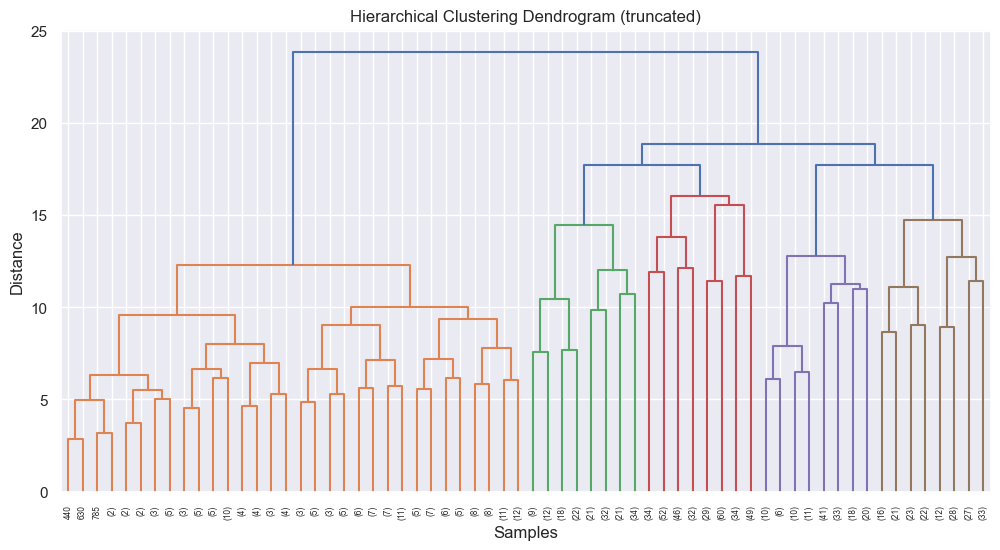

In [28]:
plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='level',  # prevents clutter
    p=5
)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


## K-Modes Clustering
---

In [32]:
X_cat_with_flag = data.copy()
X_cat_without_flag = X_cat_with_flag[categorical_cols]

In [33]:
X_cat_with_flag.head()

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness,self_employed_missing
0,Female,United States,Corporate,Unknown,No,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Not Sure,1
1,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,No,1
2,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,1
3,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,0
4,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,0


In [34]:
X_cat_without_flag.head()

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness
0,Female,United States,Corporate,Unknown,No,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Not Sure
1,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,Female,United States,Corporate,Unknown,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,Female,United States,Corporate,No,Yes,Yes,1-14 Days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [38]:
kmodes_with_flag = KModes(
    n_clusters=4,
    init='Huang',
    n_init=10,
    verbose=1,
    random_state=42
)

clusters_kmodes_flag = kmodes_with_flag.fit_predict(X_cat_with_flag)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 94470, cost: 1972373.0
Run 1, iteration: 2/100, moves: 12745, cost: 1972373.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 94675, cost: 1955922.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 86376, cost: 1923600.0
Run 3, iteration: 2/100, moves: 35205, cost: 1923600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 83475, cost: 1934080.0
Run 4, iteration: 2/100, moves: 29602, cost: 1934080.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 91195, cost: 1967021.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 95651, cost: 1949584.0
Init: initializing centro

In [39]:
df_kmodes_flag = X_cat_with_flag.copy()
df_kmodes_flag['cluster'] = clusters_kmodes_flag

In [40]:
df_kmodes_flag['cluster'].value_counts().sort_index()

cluster
0    89754
1    83333
2    59798
3    57166
Name: count, dtype: int64

In [41]:
cluster_modes = pd.DataFrame(
    kmodes_with_flag.cluster_centroids_,
    columns=X_cat_with_flag.columns
)

cluster_modes

,gender,country,occupation,self_employed,family_mh_history,sought_treatment,days_spent_indoors,noticed_growing_stress,noticed_habit_changes,personal_mh_history,mood_swings,coping_difficulty,work_engagement,social_difficulty,disclose_mh_to_employer,care_options_awareness,self_employed_missing
0,Male,United States,Business,No,Yes,Yes,15-30 Days,Maybe,No,No,Low,No,No,No,No,Yes,0
1,Male,United States,Corporate,No,No,No,1-14 Days,Yes,Maybe,Maybe,Low,No,Yes,Maybe,No,No,0
2,Male,United States,Housewife,No,No,Yes,1-14 Days,No,Yes,Maybe,Low,Yes,Maybe,Yes,No,Yes,0
3,Male,United States,Corporate,No,No,No,Go Out Every Day,Yes,Yes,Yes,Medium,Yes,No,No,No,No,0
